In [1]:
from astropy import units as u
from astropy.coordinates import SkyCoord
from regions import CircleSkyRegion
import matplotlib.pyplot as plt
from utils3d import longitudeaxistrue, latitudeaxistrue, log10eaxistrue

# %matplotlib inline
from IPython.display import display
from gammapy.datasets import Datasets, MapDataset
from gammapy.modeling.models import (
    FoVBackgroundModel,
    Models,
    PowerLawNormSpectralModel,
    SkyModel,
    TemplateSpatialModel,
    create_fermi_isotropic_diffuse_model,
)


# %matplotlib inline
import numpy as np
from gammapy.maps import Map, MapAxis, MapAxes, WcsGeom

/Users/lpin0002/anaconda3/envs/please/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
print(longitudeaxistrue, latitudeaxistrue, log10eaxistrue)

[-3.5 -3.3 -3.1 -2.9 -2.7 -2.5 -2.3 -2.1 -1.9 -1.7 -1.5 -1.3 -1.1 -0.9
 -0.7 -0.5 -0.3 -0.1  0.1  0.3  0.5  0.7  0.9  1.1  1.3  1.5  1.7  1.9
  2.1  2.3  2.5  2.7  2.9  3.1  3.3  3.5] [-3.  -2.8 -2.6 -2.4 -2.2 -2.  -1.8 -1.6 -1.4 -1.2 -1.  -0.8 -0.6 -0.4
 -0.2  0.   0.2  0.4  0.6  0.8  1.   1.2  1.4  1.6  1.8  2.   2.2  2.4
  2.6  2.8  3. ] [-0.8  -0.79 -0.78 -0.77 -0.76 -0.75 -0.74 -0.73 -0.72 -0.71 -0.7  -0.69
 -0.68 -0.67 -0.66 -0.65 -0.64 -0.63 -0.62 -0.61 -0.6  -0.59 -0.58 -0.57
 -0.56 -0.55 -0.54 -0.53 -0.52 -0.51 -0.5  -0.49 -0.48 -0.47 -0.46 -0.45
 -0.44 -0.43 -0.42 -0.41 -0.4  -0.39 -0.38 -0.37 -0.36 -0.35 -0.34 -0.33
 -0.32 -0.31 -0.3  -0.29 -0.28 -0.27 -0.26 -0.25 -0.24 -0.23 -0.22 -0.21
 -0.2  -0.19 -0.18 -0.17 -0.16 -0.15 -0.14 -0.13 -0.12 -0.11 -0.1  -0.09
 -0.08 -0.07 -0.06 -0.05 -0.04 -0.03 -0.02 -0.01  0.    0.01  0.02  0.03
  0.04  0.05  0.06  0.07  0.08  0.09  0.1   0.11  0.12  0.13  0.14  0.15
  0.16  0.17  0.18  0.19  0.2   0.21  0.22  0.23  0.24  0.25  0.26  0.27


# HESS GPS Sources

In [3]:
from gammapy.catalog import SourceCatalogHGPS


hess_catalog = SourceCatalogHGPS("hgps_catalog_v1.fits.gz")

hess_models = hess_catalog.to_models()

print(f"\nThere are {len(hess_models)} sources within the HGPS.")

/Users/lpin0002/anaconda3/envs/please/lib/python3.9/site-packages/gammapy/modeling/models/spatial.py:554: RuntimeWarning: invalid value encountered in multiply
  return u.Quantity(norm * np.exp(exponent).value, "sr-1", copy=False)



There are 96 sources within the HGPS.


In [4]:


trueenergyaxis = 10**log10eaxistrue*u.TeV

energy_axis_true = MapAxis.from_nodes(trueenergyaxis, interp='log', name="energy_true")

goodgeom = WcsGeom.create(
    skydir=SkyCoord(0, 0, unit="deg", frame='galactic'),
    binsz=0.2,
    width=(longitudeaxistrue[-1]-longitudeaxistrue[0]+0.2, latitudeaxistrue[-1]-latitudeaxistrue[0]+0.2),
    frame="galactic",
    proj="CAR",
    axes=[energy_axis_true],
)

goodmap = Map.from_geom(goodgeom)
goodmap

WcsNDMap

	geom  : WcsGeom 
 	axes  : ['lon', 'lat', 'energy_true']
	shape : (36, 31, 261)
	ndim  : 3
	unit  : 
	dtype : float32

In [5]:
hessenergyaxis = energy_axis_true.center.value
np.log10(hessenergyaxis[1:]-hessenergyaxis[:-1])

array([-2.43277472, -2.42277472, -2.41277472, -2.40277472, -2.39277472,
       -2.38277472, -2.37277472, -2.36277472, -2.35277472, -2.34277472,
       -2.33277472, -2.32277472, -2.31277472, -2.30277472, -2.29277472,
       -2.28277472, -2.27277472, -2.26277472, -2.25277472, -2.24277472,
       -2.23277472, -2.22277472, -2.21277472, -2.20277472, -2.19277472,
       -2.18277472, -2.17277472, -2.16277472, -2.15277472, -2.14277472,
       -2.13277472, -2.12277472, -2.11277472, -2.10277472, -2.09277472,
       -2.08277472, -2.07277472, -2.06277472, -2.05277472, -2.04277472,
       -2.03277472, -2.02277472, -2.01277472, -2.00277472, -1.99277472,
       -1.98277472, -1.97277472, -1.96277472, -1.95277472, -1.94277472,
       -1.93277472, -1.92277472, -1.91277472, -1.90277472, -1.89277472,
       -1.88277472, -1.87277472, -1.86277472, -1.85277472, -1.84277472,
       -1.83277472, -1.82277472, -1.81277472, -1.80277472, -1.79277472,
       -1.78277472, -1.77277472, -1.76277472, -1.75277472, -1.74

In [6]:

# fig, ax = plt.subplots(2,4, figsize=(8,3))


# m = Map.create(skydir=(0, 0), width=(10, 10), binsz=0.1, frame="galactic")
m= goodmap
count=0
fullhessdataset = 0
for idx, model in enumerate(hess_models):
    templvalue = model.spatial_model.position.l.value
    tempbvalue = model.spatial_model.position.b.value
    
    if templvalue>180:
        templvalue=templvalue-360
    
    if np.abs(templvalue)<5 and np.abs(tempbvalue)<5:
        print(templvalue, tempbvalue, idx)
        try:
            m.quantity = model.evaluate_geom(m.geom)
            # m.plot(ax=ax[count//4, count%4], add_cbar=True)
            startdata = m.data
            data = startdata[~np.isnan(startdata)]
            if data.size!=0:
                data = data.reshape(startdata.shape)
                fullhessdataset+=data
            
        except:
            print("Something weird happened")
            print(idx, '\n\n')
        count+=1
# plt.show()
fullhessdataset = np.transpose(fullhessdataset, axes=(0,2,1))

-1.723175048828125 0.04908088967204094 46
-0.05511474609375 -0.043911051005125046 47
-1.35516357421875 -0.5642170310020447 48
0.14000000059604645 -0.11400000005960464 49
-1.551788330078125 -1.1144022941589355 50
3.779721736907959 1.714707851409912 51
0.871999979019165 0.07599999755620956 52


In [7]:
150*500*500/250000

150.0

In [8]:
hessgeom = goodmap.geom
hesslonvals = hessgeom.get_coord().lon.value[0][0]
hesslonvals = hesslonvals[::-1]
hesslonvals[hesslonvals>180] = hesslonvals[hesslonvals>180]-360
# print("lon vals", hesslonvals)

hesslatvals = hessgeom.get_coord().lat.value[0][:,0]
# print("lat vals", hesslatvals)
print(hesslonvals.shape)
print(hesslatvals.shape)

(36,)
(31,)


In [9]:
m.quantity.unit

Unit("1 / (cm2 s sr TeV)")

In [10]:
fullhessdataset[0,0,0]

4.4565765388799496e-206

(36,) (31,) (36, 31)


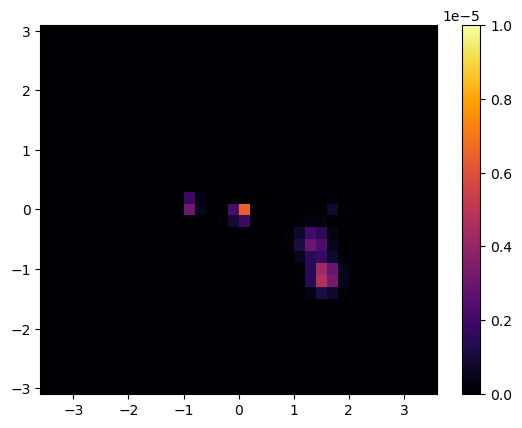

In [11]:
from scipy.ndimage import gaussian_filter

blurred_hess_data = fullhessdataset
print(hesslonvals.shape, hesslatvals.shape, blurred_hess_data[0].shape)
# Factor of 1e6 is so it matches with fermi backgrounds which are 1/MeV
plt.pcolormesh(hesslonvals, 
               hesslatvals, 
               np.max(blurred_hess_data, axis=0).T, cmap='inferno', vmax=1e-5)
plt.colorbar()
plt.show()

# Fermi-LAT Diffuse Background Extraction

In [12]:
# template_diffuse = TemplateSpatialModel(Map.read(
#     filename="gll_iem_v06_gc.fits.gz"), interp_kwargs={'method':'cubic'}, normalize=False
# )

template_diffuse = TemplateSpatialModel.read(
    filename="gll_iem_v06_gc.fits.gz", normalize=False
)

print(template_diffuse.map)

diffuse_iem = SkyModel(
    spectral_model=PowerLawNormSpectralModel(),
    spatial_model=template_diffuse,
    name="diffuse-iem",
)

template_diffuse

WcsNDMap

	geom  : WcsGeom 
 	axes  : ['lon', 'lat', 'energy_true']
	shape : (120, 64, 30)
	ndim  : 3
	unit  : 1 / (cm2 MeV s sr)
	dtype : >f4



In [13]:
fermievaluated = np.transpose(diffuse_iem.evaluate_geom(goodgeom), axes=(0,2,1))
fermievaluated.shape

(261, 36, 31)

In [14]:
fermievaluated = fermievaluated.to(1/u.TeV/u.s/u.sr/(u.cm)**2)

In [15]:
fermievaluated[0,0,0]

<Quantity 7.65760877e-08 1 / (cm2 s sr TeV)>

In [16]:
fermilonaxistemp = np.unique(goodgeom.to_image().get_coord().lon.value)
firstover180idx = np.where(fermilonaxistemp>180)[0][0]
fermilonaxistemp[fermilonaxistemp>180] = fermilonaxistemp[fermilonaxistemp>180]-360
fermilonaxistemp.sort()
fermilonaxistemp.shape
fermilonaxis = fermilonaxistemp
fermilonaxis

array([-3.5, -3.3, -3.1, -2.9, -2.7, -2.5, -2.3, -2.1, -1.9, -1.7, -1.5,
       -1.3, -1.1, -0.9, -0.7, -0.5, -0.3, -0.1,  0.1,  0.3,  0.5,  0.7,
        0.9,  1.1,  1.3,  1.5,  1.7,  1.9,  2.1,  2.3,  2.5,  2.7,  2.9,
        3.1,  3.3,  3.5])

In [17]:
fermilataxis = goodgeom.get_coord().lat.value[0][:,0]
fermilataxis

array([-3. , -2.8, -2.6, -2.4, -2.2, -2. , -1.8, -1.6, -1.4, -1.2, -1. ,
       -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,
        1.4,  1.6,  1.8,  2. ,  2.2,  2.4,  2.6,  2.8,  3. ])

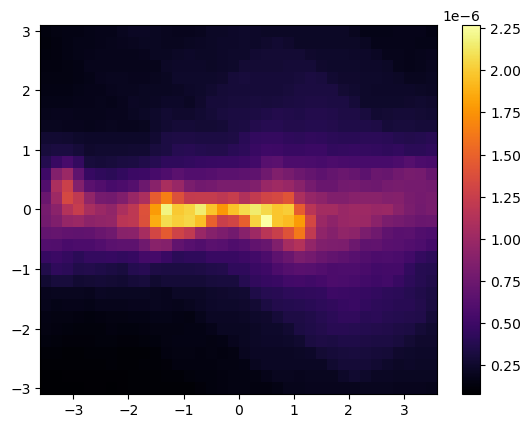

In [18]:
fig, ax = plt.subplots(1,1)
plt.pcolormesh(fermilonaxis, fermilataxis, fermievaluated[0].T, cmap='inferno')
plt.colorbar()
plt.show()

In [19]:
fermiunit = fermievaluated.unit
fermiunit

Unit("1 / (cm2 s sr TeV)")

In [20]:
fermienergyvals = energy_axis_true.center.value
fermienergyvals

array([ 0.15848932,  0.16218101,  0.16595869,  0.16982437,  0.17378008,
        0.17782794,  0.18197009,  0.18620871,  0.19054607,  0.19498446,
        0.19952623,  0.20417379,  0.20892961,  0.21379621,  0.21877616,
        0.22387211,  0.22908677,  0.23442288,  0.23988329,  0.24547089,
        0.25118864,  0.25703958,  0.2630268 ,  0.26915348,  0.27542287,
        0.28183829,  0.28840315,  0.29512092,  0.30199517,  0.30902954,
        0.31622777,  0.32359366,  0.33113112,  0.33884416,  0.34673685,
        0.35481339,  0.36307805,  0.37153523,  0.3801894 ,  0.38904514,
        0.39810717,  0.40738028,  0.41686938,  0.42657952,  0.43651583,
        0.44668359,  0.45708819,  0.46773514,  0.47863009,  0.48977882,
        0.50118723,  0.51286138,  0.52480746,  0.5370318 ,  0.54954087,
        0.56234133,  0.57543994,  0.58884366,  0.60255959,  0.616595  ,
        0.63095734,  0.64565423,  0.66069345,  0.67608298,  0.69183097,
        0.70794578,  0.72443596,  0.74131024,  0.75857758,  0.77

In [21]:
fermievaluated[0,0,0]

<Quantity 7.65760877e-08 1 / (cm2 s sr TeV)>

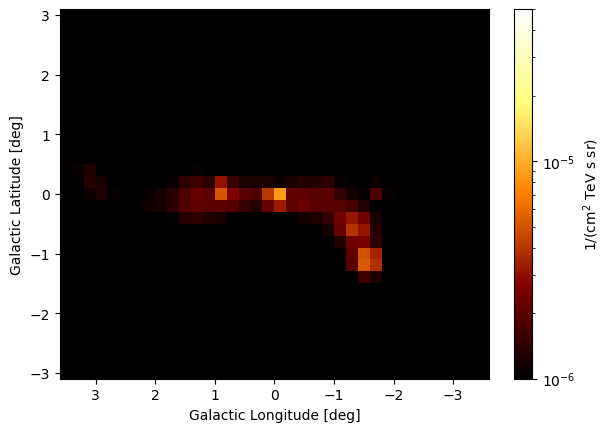

In [22]:
from matplotlib.colors import LogNorm


fermiplotmap = fermievaluated.value
combinedplotmap = np.flip(fermiplotmap + fullhessdataset, axis=1)



fig6, ax = plt.subplots(dpi=100)
plt.pcolormesh(fermilonaxis, fermilataxis, np.max(combinedplotmap,axis=0).T, cmap='afmhot', norm=LogNorm(vmin=1e-6, vmax=5e-5))
plt.xlabel("Galactic Longitude [deg]")
ax.invert_xaxis()

plt.ylabel("Galactic Latitude [deg]")
ax.set_aspect(1)
plt.colorbar(fraction=0.05, label=r"1/(cm$^2$ TeV s sr)")

plt.show()

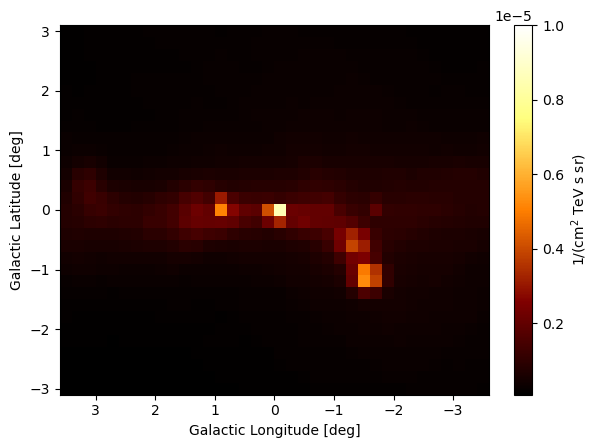

In [23]:
fig6, ax = plt.subplots(dpi=100)
plt.pcolormesh(fermilonaxis, fermilataxis, np.max(combinedplotmap,axis=0).T, cmap='afmhot', vmax=1e-5)
plt.xlabel("Galactic Longitude [deg]")
ax.invert_xaxis()
plt.ylabel("Galactic Latitude [deg]")
ax.set_aspect(1)
plt.colorbar(fraction=0.05, label=r"1/(cm$^2$ TeV s sr)")

plt.show()

In [24]:
combinedplotmap.shape

(261, 36, 31)

In [25]:
from utils3d import irfs

In [26]:
aeff = irfs['aeff']

In [27]:
aefffunc = lambda energy, offset: aeff.evaluate(energy_true = energy*u.TeV, offset=offset*u.deg).to(u.cm**2).value

In [28]:
lonmesh, energymesh, latmesh  = np.meshgrid(fermilonaxis, fermienergyvals, fermilataxis)

lonmesh.shape

(261, 36, 31)

In [29]:
(lonmesh**2).shape

(261, 36, 31)

In [30]:
aefftable = aefffunc(energymesh, np.sqrt((lonmesh**2)+(latmesh**2)))

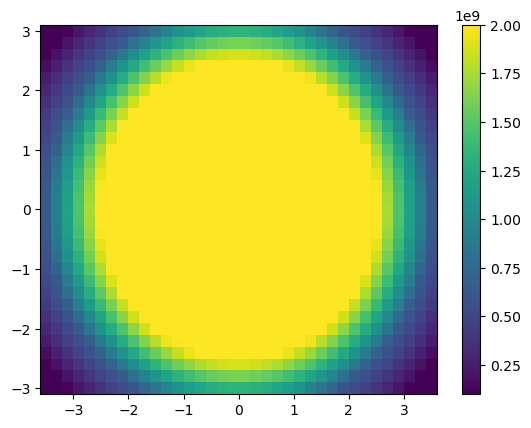

In [31]:
plt.pcolormesh(fermilonaxis, fermilataxis, aefftable[0,:,:].T, vmin=1e8, vmax=2e9)
plt.colorbar()
plt.show()

In [32]:
# aefftable[75,250,250]

In [33]:
# fermilataxis[250]

In [34]:
# aefffunc(fermienergyvals[75], np.sqrt(fermilonaxis[250]**2+fermilataxis[250]**2))

In [35]:
np.log(fermienergyvals[1:]-fermienergyvals[:-1])

array([-5.6016708 , -5.57864495, -5.5556191 , -5.53259325, -5.50956739,
       -5.48654154, -5.46351569, -5.44048984, -5.41746399, -5.39443814,
       -5.37141229, -5.34838644, -5.32536059, -5.30233474, -5.27930889,
       -5.25628303, -5.23325718, -5.21023133, -5.18720548, -5.16417963,
       -5.14115378, -5.11812793, -5.09510208, -5.07207623, -5.04905038,
       -5.02602453, -5.00299867, -4.97997282, -4.95694697, -4.93392112,
       -4.91089527, -4.88786942, -4.86484357, -4.84181772, -4.81879187,
       -4.79576602, -4.77274017, -4.74971431, -4.72668846, -4.70366261,
       -4.68063676, -4.65761091, -4.63458506, -4.61155921, -4.58853336,
       -4.56550751, -4.54248166, -4.5194558 , -4.49642995, -4.4734041 ,
       -4.45037825, -4.4273524 , -4.40432655, -4.3813007 , -4.35827485,
       -4.335249  , -4.31222315, -4.2891973 , -4.26617144, -4.24314559,
       -4.22011974, -4.19709389, -4.17406804, -4.15104219, -4.12801634,
       -4.10499049, -4.08196464, -4.05893879, -4.03591294, -4.01

In [36]:
combinedplotmapwithaeff = aefftable*combinedplotmap
combinedplotmapwithaeff = combinedplotmapwithaeff
topbound=1e100
combinedplotmapwithaeff[combinedplotmapwithaeff>topbound] = topbound
normalisation = np.sum(combinedplotmapwithaeff.T*10**log10eaxistrue)
# combinedplotmapwithaeff=combinedplotmapwithaeff/normalisation
# modtopbound = topbound/normalisation
spatialplotcombined = np.sum((combinedplotmapwithaeff.T*10**log10eaxistrue).T, axis=0)
spatialplotcombinedmaxvalue = np.max(spatialplotcombined)

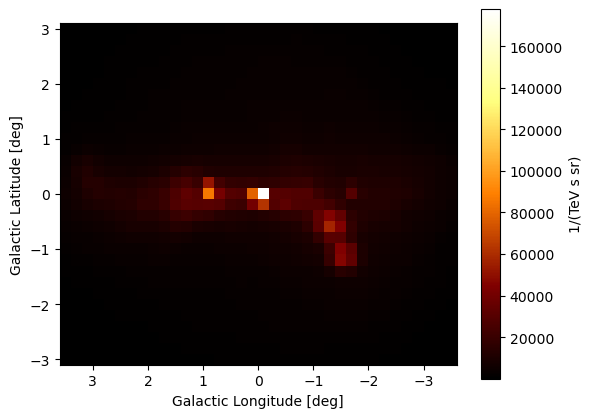

In [37]:
fig, ax = plt.subplots(1,1, dpi=100)
plt.pcolormesh(fermilonaxis, fermilataxis, spatialplotcombined.T, vmax=spatialplotcombinedmaxvalue, vmin=spatialplotcombinedmaxvalue/1e4, cmap='afmhot')
plt.xlabel("Galactic Longitude [deg]")
plt.ylabel("Galactic Latitude [deg]")
ax.invert_xaxis()
plt.colorbar(label = r"1/(TeV s sr)")
ax.set_aspect(1)

plt.show()

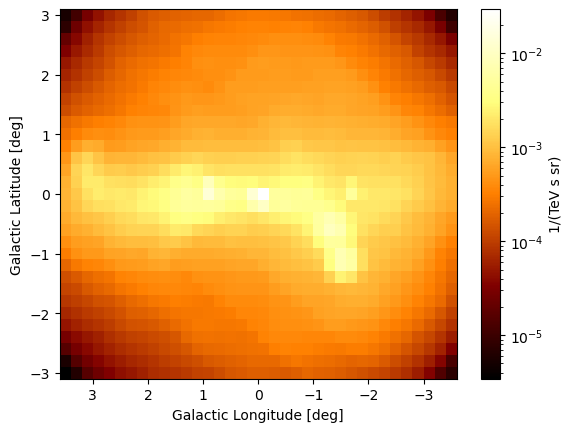

In [38]:
fig, ax = plt.subplots(1,1, dpi=100)
plt.pcolormesh(fermilonaxis, fermilataxis, spatialplotcombined.T/normalisation, norm=LogNorm(), cmap='afmhot')
plt.xlabel("Galactic Longitude [deg]")
plt.ylabel("Galactic Latitude [deg]")
ax.invert_xaxis()
plt.colorbar(label = r"1/(TeV s sr)")
plt.show()

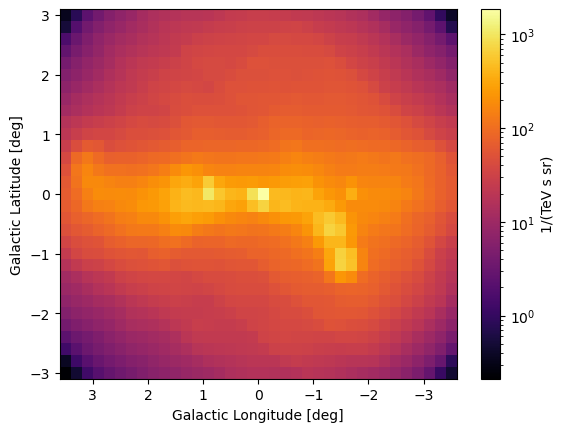

In [39]:
fig, ax = plt.subplots(1,1)
plt.pcolormesh(fermilonaxis, fermilataxis, np.mean(combinedplotmapwithaeff, axis=0).T, norm=LogNorm(), cmap='inferno')
plt.xlabel("Galactic Longitude [deg]")
plt.ylabel("Galactic Latitude [deg]")
ax.invert_xaxis()
plt.colorbar(label = r"1/(TeV s sr)")
plt.show()

In [40]:
np.min(combinedplotmapwithaeff)

1.6956726367231233e-202

In [41]:
np.save("unnormalised_astrophysicalbackground.npy", combinedplotmapwithaeff)

In [42]:
latitudeaxistrue

array([-3. , -2.8, -2.6, -2.4, -2.2, -2. , -1.8, -1.6, -1.4, -1.2, -1. ,
       -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,
        1.4,  1.6,  1.8,  2. ,  2.2,  2.4,  2.6,  2.8,  3. ])

In [43]:
fermilataxis

array([-3. , -2.8, -2.6, -2.4, -2.2, -2. , -1.8, -1.6, -1.4, -1.2, -1. ,
       -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,
        1.4,  1.6,  1.8,  2. ,  2.2,  2.4,  2.6,  2.8,  3. ])

In [44]:
fermilonaxis

array([-3.5, -3.3, -3.1, -2.9, -2.7, -2.5, -2.3, -2.1, -1.9, -1.7, -1.5,
       -1.3, -1.1, -0.9, -0.7, -0.5, -0.3, -0.1,  0.1,  0.3,  0.5,  0.7,
        0.9,  1.1,  1.3,  1.5,  1.7,  1.9,  2.1,  2.3,  2.5,  2.7,  2.9,
        3.1,  3.3,  3.5])

In [45]:
longitudeaxistrue.shape

(36,)